In [79]:
reset -fs

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import DistanceMetric
%matplotlib inline

plt.style.use("fivethirtyeight")
pd.set_option('display.max_columns', 100)

In [81]:
full_data = pd.read_csv("ts_corn_47yr_df.csv")

full_data.fips_code = full_data.fips_code.astype(str).apply(lambda x: x.zfill(5))
full_data.set_index('fips_code', inplace=True)
full_data.columns = full_data.columns.astype(int)
full_data.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,56.0,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,40.0,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,42.0,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,68.0,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,104.0,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


# Linear Regression

Fips Code: 01049


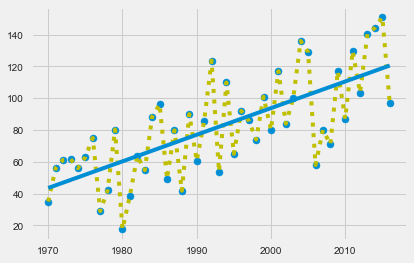

Fips Code: 19087


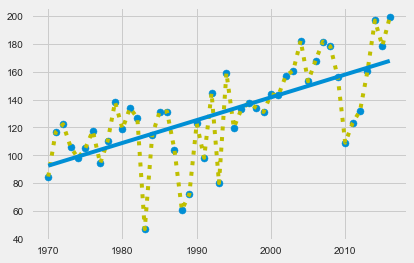

Fips Code: 27147


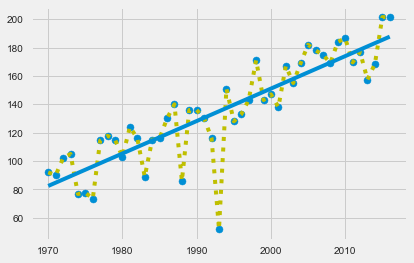

Fips Code: 39099


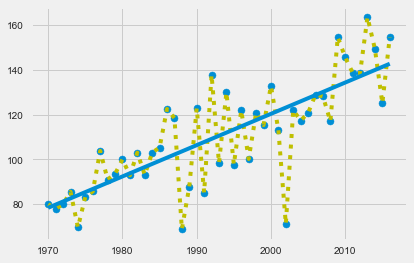

Fips Code: 55109


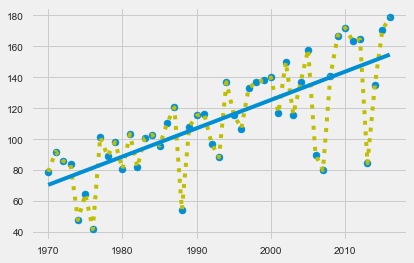

In [82]:
for i in range(0, full_data.shape[0], 200): # Choose 5 Counties from dataset to fit a linear regression  
    print("Fips Code: {}".format(full_data.iloc[i].name))
    X = np.array(full_data.columns).reshape(-1,1)
    y = full_data.iloc[i].values
    lm = LinearRegression()
    lm.fit(X, y)
    preds = lm.predict(X)
    plt.scatter(X, y) # true values
    plt.plot(X, y, 'y:') 
    plt.plot(X, preds) # plot line of best fit
    plt.show();

# Randomly create an array of years to remove from complete dataset

In [83]:
pop_list = np.random.randint(1970,2017, full_data.shape[0])
pop_list[:5]

array([1971, 1974, 1975, 1976, 1995])

/Users/adamszabunio/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


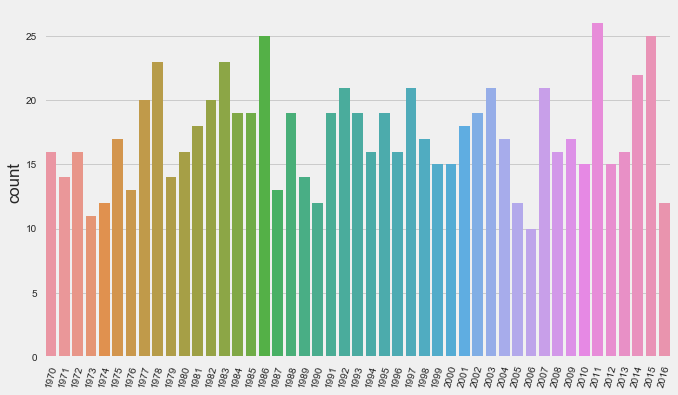

In [84]:
fig, ax = plt.subplots(figsize=(10,6))
plt.xticks(rotation=75)
sns.countplot(pop_list); # distribution of random draws (count by year) TODO: add x/y labels, titles, and legends to all plots

# Keep track of all the removed data 

In [85]:
true = [full_data.iloc[i][yr] for i, yr in enumerate(pop_list)]
true[:5]

[56.0, 40.0, 42.0, 68.0, 104.0]

In [86]:
full_test = full_data.copy() # make a copy before removing data
for i, yr in enumerate(pop_list):
    full_test.iloc[i][yr] = np.nan 

In [87]:
full_test.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
fips_code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
01049,35.0,NaN,61.2,61.7,56.0,63.0,75.0,29.0,42.1,80.3,17.6,38.7,63.9,54.7,88.4,96.2,49.3,79.8,41.8,90.0,60.6,85.6,123.7,53.8,109.9,65.0,92.0,86.0,74.0,101.0,80.0,117.0,84.0,100.0,136.0,129.0,58.0,80.0,71.0,117.0,87.0,129.7,103.5,140.5,144.3,151.0,96.8
01077,25.0,42.0,51.4,55.5,NaN,50.0,50.0,36.0,66.4,51.6,40.3,76.7,79.4,52.0,70.0,84.9,70.0,77.9,34.5,79.3,35.9,54.5,104.0,54.7,96.2,95.0,80.0,76.0,61.0,100.0,95.0,128.0,99.0,145.0,135.0,112.0,84.0,92.0,99.0,130.0,126.5,124.8,75.7,154.6,184.4,161.6,106.5
01079,30.0,45.0,52.5,54.4,34.0,NaN,53.0,33.0,30.3,42.6,20.0,69.7,69.6,41.1,67.9,74.5,75.0,65.7,31.1,83.3,44.3,78.6,109.2,65.6,110.9,92.0,82.0,108.0,68.0,136.0,99.0,138.0,115.0,153.0,151.0,136.0,77.0,73.0,98.0,112.0,143.0,132.5,78.6,172.0,187.1,140.3,117.2
01083,33.0,44.0,47.3,49.0,40.0,44.0,NaN,38.0,71.7,71.9,47.3,67.5,75.8,61.0,71.7,101.6,69.3,58.2,30.3,82.2,41.2,70.2,119.1,66.7,93.9,94.0,90.0,86.0,71.0,112.0,86.0,146.0,107.0,150.0,150.0,139.0,85.0,100.0,122.0,142.0,144.5,128.3,71.9,159.3,181.7,170.8,112.9
01089,33.0,51.0,56.7,61.1,54.0,75.0,79.0,35.0,61.3,74.9,25.2,55.4,96.0,55.9,78.5,98.1,63.3,71.2,45.9,80.0,49.3,82.0,98.9,50.0,116.7,NaN,93.0,83.0,68.0,121.0,88.0,118.0,102.0,125.0,137.0,143.0,90.0,100.0,153.0,128.0,113.9,147.9,110.6,161.6,169.0,173.2,150.7


### Save test set with missing values to try additional imputation techniques

In [88]:
full_test.to_csv("corn_test_df.csv") 

# Plot Linear Regression on data with one random missing value for each year 


 For Random Year: 1971 and Fips Code: 01049
 True: 56.00
 Predicted: 44.29
 Residual: -11.71


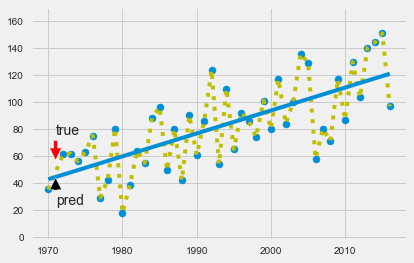


 For Random Year: 2009 and Fips Code: 18009
 True: 165.00
 Predicted: 148.51
 Residual: -16.49


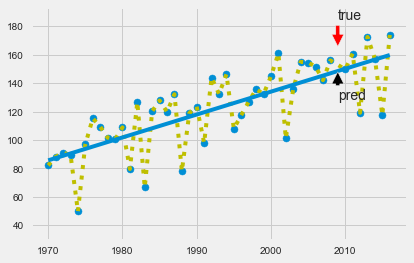


 For Random Year: 1985 and Fips Code: 19087
 True: 131.20
 Predicted: 116.64
 Residual: -14.56


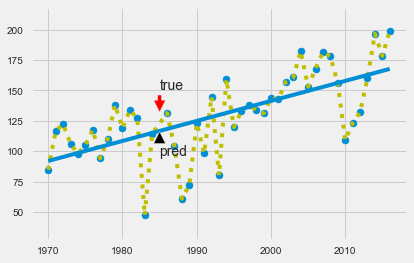


 For Random Year: 2007 and Fips Code: 21231
 True: 132.00
 Predicted: 148.97
 Residual: 16.97


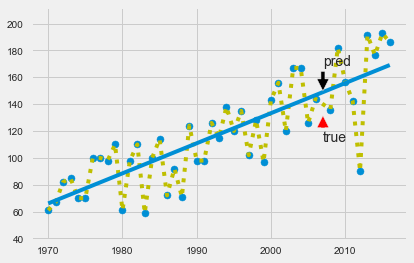


 For Random Year: 2010 and Fips Code: 27147
 True: 186.50
 Predicted: 173.21
 Residual: -13.29


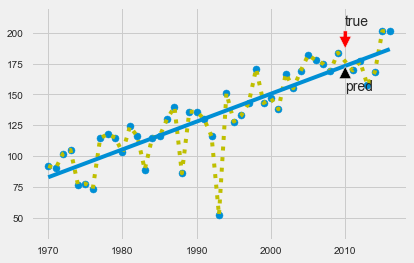


 For Random Year: 2001 and Fips Code: 31137
 True: 194.10
 Predicted: 178.11
 Residual: -15.99


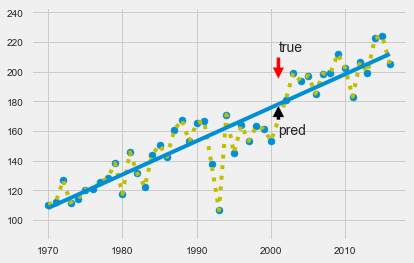


 For Random Year: 2007 and Fips Code: 39099
 True: 128.10
 Predicted: 130.16
 Residual: 2.06


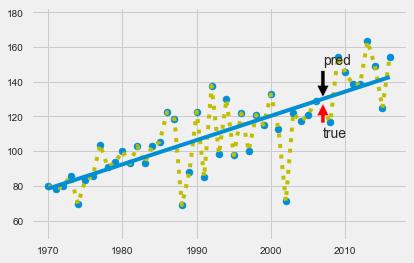


 For Random Year: 1981 and Fips Code: 47047
 True: 75.00
 Predicted: 64.84
 Residual: -10.16


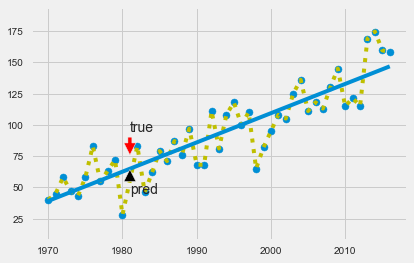


 For Random Year: 1977 and Fips Code: 55109
 True: 101.50
 Predicted: 82.44
 Residual: -19.06


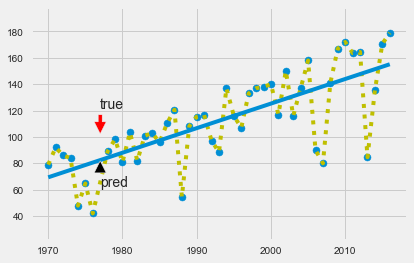

In [89]:
for i in range(0, full_data.shape[0], 100):
    X = full_data.columns.tolist() # years (1970 - 2016)
    X.remove(pop_list[i]) # remove the randomly chosen year
    X_miss = np.array(X).reshape(-1,1) # Final X to use for predictions
    y = full_test.iloc[i].dropna().values 
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1) # X to predict on for all years
    preds = lm.predict(X_full)
    pred_val = preds[pop_list[i]-1970] # idx for the predicition of missing val
    pred_yr = pop_list[i] # year of missing point
    
    print("\n For Random Year: {} and Fips Code: {}\n True: {:.2f}\n Predicted: {:.2f}\n Residual: {:.2f}"\
          .format(pred_yr, full_test.iloc[i].name, true[i], pred_val, pred_val-true[i]))
    
    if pred_val > true[i]: # set bounds for plotting points
        dist = 20
    else:
        dist = -20
    plt.ylim(min(true[i], min(y))-20, max(y)+20) # set bounds for y-axis to capture extreme true values
    plt.annotate('pred', xy=(pred_yr, pred_val), xytext=(pred_yr, pred_val+dist),
                arrowprops=dict(facecolor='black', shrink=0.05))
    plt.annotate('true', xy=(pred_yr, true[i]), xytext=(pred_yr, true[i]-dist),
                arrowprops=dict(facecolor='red', shrink=0.05))
    plt.scatter(X_miss, y) # "complete" data (w/o removed value)
    plt.plot(X_miss, y, 'y:') 
    plt.plot(X_full, preds) # line of best fit
    plt.show();
plt.close('all')

# LR predictions for all missing values

In [90]:
y_pred = []
for i in range(full_data.shape[0]):
    X = full_data.columns.tolist()
    X.remove(pop_list[i])
    X_miss = np.array(X).reshape(-1,1)
    y = full_test.iloc[i].dropna().values
    lm = LinearRegression()
    lm.fit(X_miss, y)
    
    X_full = np.array(full_data.columns).reshape(-1,1)
    preds = lm.predict(X_full)
    y_pred.append(preds[pop_list[i]-1970])

# Fill Methods 
### Foward Fill 
- and Back Fill if the missing data point is the first year in the series

### Mean Value imputation 
- For Each County (Average of remaining Years) 
- For Each Year (Average of all remaining Counties) 


In [91]:
# fill in missing values (1) with the value of the previous year for that specific county
ffill_df = full_test.copy()
ffill_df.fillna(method='ffill', axis=1, inplace=True)
# unless it is the first year in the series, then fill in value from the second year
ffill_df.fillna(method='bfill', axis=1, inplace=True)

ffill_preds = [ffill_df.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

# fill in missing values (1) with the mean of all years for that specific county
yr_mean_df = full_test.copy()
yr_mean_df = yr_mean_df.apply(lambda x: x.fillna(x.mean()),axis=1)

yr_mean_preds = [yr_mean_df.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

# NOTE: we have to be careful with the interpretation of this method vs other methods. 
# fill in missing values (random number per year) with the mean of each year 
county_mean_df = full_test.copy()
county_mean_df = county_mean_df.apply(lambda x: x.fillna(x.mean()),axis=0)

county_mean_preds = [county_mean_df.iloc[i][pop_list[i]] for i in range(full_test.shape[0])]

# Spatial Methods 
- Dot product of Distance Norms 
    - Euclidean --> "As the crow flies" in 2 dimensions
    - Haversine --> No, naysayers, the world is not flat

In [92]:
centroids_df = pd.read_csv("county_centroids.csv", index_col=0)
centroids_df.fips_code = centroids_df.fips_code.astype(str).apply(lambda x: x.zfill(5))
centroids_df.set_index('fips_code', inplace=True)
full_data_centroids = full_data.join(centroids_df) 
full_spatial = full_data_centroids[['latitude', 'longitude']]
full_spatial.head()

,latitude,longitude
fips_code,,
01049,34.459800,-85.804109
01077,34.901407,-87.654010
01079,34.521676,-87.310989
01083,34.810099,-86.981401
01089,34.763090,-86.550226


# Euclidean Distance

In [93]:
dist = DistanceMetric.get_metric("euclidean")

euc_dist_df = pd.DataFrame(dist.pairwise(full_spatial))
euc_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,1.901880,1.508150,1.228302,0.805404,4.992601,5.019581,5.035571,5.529131,35.763351,36.329100,19.562116,17.520143,11.232657,11.368169,11.229390,3.415818,4.052254,3.159062,4.147615,4.527208,3.643113,3.503317,7.716965,7.398483,7.880120,8.657621,7.081290,6.164590,6.158757,5.503394,5.394855,8.003680,5.832350,5.568189,5.377760,5.566299,6.596962,4.713068,7.452875,4.098385,6.708908,7.308882,8.004172,8.164047,8.139030,6.604038,5.121107,6.490356,9.051962,...,10.232360,11.567785,13.156921,11.939326,9.673745,10.167009,9.335442,9.415339,12.127998,11.638803,9.673628,9.732401,9.055216,9.886828,9.576185,11.055255,9.062160,10.399784,8.420064,10.218076,10.837409,9.272506,9.866123,11.162619,10.026282,10.637425,10.850112,10.305718,11.869524,12.209264,12.848677,10.676839,8.589511,10.044212,8.837643,12.236695,12.490808,9.878178,10.745464,9.505686,11.303025,10.427618,8.653225,12.911470,9.233252,8.916203,10.497799,10.247538,10.856652,20.056443
1,1.901880,0.000000,0.511721,0.678778,1.112417,3.128709,3.120440,3.149268,3.628289,33.876531,34.443958,17.667402,15.626438,12.789592,12.879876,12.827166,4.804393,5.945113,4.533139,5.858597,6.413465,4.843505,5.068092,6.193944,5.932549,6.767566,7.521306,5.696719,5.266977,4.919897,4.105463,4.411025,7.080683,4.900541,4.778022,4.262385,4.321718,5.724162,3.341665,6.128637,2.918803,5.228138,6.429310,6.526936,6.760655,6.911037,5.848317,4.138911,4.981224,7.890650,...,9.557934,10.327352,11.931765,10.795136,8.728379,8.958921,8.354288,8.579814,10.904270,10.475167,8.891401,8.530780,8.018833,9.007031,8.470676,9.930993,8.196565,9.352450,7.685335,9.614749,9.647436,8.145083,9.219837,10.216122,9.087213,9.517572,10.143436,9.549181,10.612853,10.914908,11.594499,9.751224,7.856633,8.917162,7.898078,11.131419,11.211568,8.828561,9.950017,8.824580,10.105990,9.256020,7.817674,11.750260,8.486686,8.142841,9.658441,9.347749,9.847745,18.180001
2,1.508150,0.511721,0.000000,0.437968,0.798149,3.613945,3.570494,3.618881,4.049570,34.259139,34.824174,18.115623,16.076530,12.598511,12.707103,12.619008,4.292675,5.507296,4.021420,5.361240,5.967900,4.336035,4.560066,6.701835,6.436179,7.230939,7.989969,6.192395,5.688189,5.395193,4.598235,4.841637,7.514920,5.325480,5.175156,4.714865,4.794990,6.143627,3.827185,6.618539,3.368952,5.732002,6.853504,7.032074,7.259880,7.390788,6.246696,4.566801,5.486929,8.363511,...,9.955396,10.813308,12.417215,11.269715,9.170811,9.439530,8.801588,9.003585,11.388781,10.951925,9.306668,9.009990,8.473937,9.439337,8.936860,10.401961,8.624475,9.811750,8.088381,9.999032,10.126622,8.613753,9.611199,10.661493,9.529388,9.987399,10.548107,9.961480,11.100892,11.407233,12.082983,10.192505,8.259939,9.387096,8.337559,11.601187,11.702506,9.287296,10.369982,9.221346,10.586556,9.732381,8.239286,12.227885,8.894478,8.554438,10.085333,9.784081,10.302123,18.646409
3,1.228302,0.678778,0.437968,0.000000,0.433730,3.772929,3.791407,3.809007,4.306084,34.555010,35.122281,18.334315,16.292547,12.187734,12.290703,12.214159,4.309619,5.278673,4.039674,5.263857,5.750879,4.410214,4.518687,6.671525,6.383199,7.068948,7.836278,6.109689,5.467344,5.262880,4.513442,4.637330,7.305845,5.111053,4.928064,4.543895,4.661502,5.918841,3.728338,6.517155,3.205968,5.682324,6.632565,6.984922,7.186654,7.261820,5.996685,4.360503,5.447305,8.217538,...,9.696884,10.694009,12.295130,11.123402,8.970456,9.308812,8.609253,8.777591,11.265221,10.810639,9.069539,8.876685,8.294797,9.224069,8.776679,10.249113,8.404542,9.637725,7.838954,9.726655,9.991712,8.458904,9.346602,10.463616,9.328118,9.832776,10.296920,9.719878,10.986798,11.305020,11.969193,9.989029,8.010483,9.233508,8.134261,11.444666,11.595939,9.113029,10.137274,8.963064,10.454287,9.

In [94]:
euc_norm = euc_dist_df.copy()
euc_norm = euc_norm.apply(lambda x: x/sum(x), axis=1)
# test to make sure we normalized along the rows (needed for dot product)
ones = np.ones(euc_norm.shape[0])
norms = [sum(euc_norm.iloc[i]) for i in euc_norm.columns.values]
assert(np.allclose(ones, norms))

euc_vals = np.array(euc_norm).dot(np.array(full_data))

euc_preds = [euc_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

# Haversine Distance

In [95]:
full_hav_df = full_spatial.copy()
full_hav_df.latitude = full_hav_df.latitude.apply(lambda x : x*np.pi/180)
full_hav_df.longitude = full_hav_df.longitude.apply(lambda x : x*np.pi/180)

dist = DistanceMetric.get_metric("haversine")
hav_dist_df = pd.DataFrame(dist.pairwise(full_hav_df))

hav_dist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,...,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813
0,0.000000,0.027646,0.021704,0.017978,0.011953,0.073580,0.072939,0.073648,0.079829,0.500626,0.508854,0.277779,0.249900,0.164157,0.167133,0.163229,0.058206,0.060338,0.053983,0.066709,0.067840,0.062969,0.058253,0.122046,0.118057,0.131565,0.144310,0.114307,0.104556,0.101088,0.088371,0.090626,0.135951,0.098558,0.095005,0.089223,0.091135,0.112216,0.075691,0.121344,0.067028,0.106735,0.124433,0.127541,0.131562,0.134213,0.113227,0.085939,0.102775,0.150523,...,0.176895,0.190688,0.217231,0.199089,0.164291,0.168249,0.158032,0.161184,0.200329,0.193648,0.166204,0.161157,0.152498,0.168787,0.160243,0.184734,0.154769,0.175108,0.144914,0.177189,0.179752,0.154778,0.170748,0.189710,0.170405,0.177817,0.187336,0.177405,0.195244,0.199802,0.211363,0.181722,0.147870,0.167736,0.150059,0.204921,0.204812,0.166246,0.184588,0.164207,0.187325,0.173309,0.148037,0.214866,0.158919,0.153181,0.179795,0.174724,0.183493,0.286060
1,0.027646,0.000000,0.008255,0.009764,0.015996,0.046817,0.045391,0.046407,0.052186,0.472993,0.481217,0.250721,0.222815,0.183426,0.185438,0.183375,0.078058,0.087877,0.073616,0.091323,0.095285,0.080291,0.080617,0.101367,0.098177,0.116365,0.128899,0.095531,0.091743,0.084136,0.069228,0.076739,0.122984,0.085322,0.083387,0.073740,0.074043,0.099719,0.056815,0.103423,0.050592,0.086563,0.111909,0.107567,0.112650,0.117614,0.102056,0.072047,0.082164,0.134847,...,0.166771,0.174305,0.201215,0.183917,0.151199,0.152116,0.144507,0.149291,0.184216,0.178213,0.154907,0.145057,0.138313,0.156440,0.145293,0.169707,0.142522,0.160918,0.134067,0.167808,0.163913,0.139536,0.160907,0.176723,0.157411,0.162801,0.176900,0.166417,0.178692,0.182810,0.194953,0.168928,0.137051,0.152575,0.136967,0.190236,0.188046,0.151981,0.173210,0.153984,0.171449,0.157650,0.136096,0.199594,0.147983,0.141939,0.167931,0.162183,0.169782,0.259667
2,0.021704,0.008255,0.000000,0.006908,0.011708,0.054674,0.052606,0.053988,0.058848,0.479712,0.487908,0.258215,0.230298,0.182217,0.184602,0.181816,0.069805,0.081118,0.065363,0.083370,0.088377,0.072077,0.072449,0.109531,0.106273,0.123924,0.136514,0.103513,0.098830,0.091860,0.077187,0.083938,0.130204,0.092453,0.090207,0.081194,0.081748,0.106784,0.064685,0.111322,0.058031,0.094668,0.119022,0.115682,0.120673,0.125373,0.108887,0.079217,0.090300,0.142509,...,0.173582,0.182105,0.208989,0.191566,0.158497,0.159862,0.151864,0.156386,0.191990,0.185893,0.161908,0.152791,0.145762,0.163624,0.152868,0.177323,0.149664,0.168401,0.140943,0.174483,0.171633,0.147144,0.167655,0.184040,0.164703,0.170408,0.183784,0.173383,0.186516,0.190689,0.202771,0.176204,0.143929,0.160190,0.144240,0.197823,0.195902,0.159463,0.180255,0.160790,0.179182,0.165340,0.143172,0.207269,0.154907,0.148904,0.175051,0.169408,0.177204,0.267464
3,0.017978,0.009764,0.006908,0.000000,0.006235,0.055834,0.054961,0.055737,0.061915,0.482657,0.490888,0.259977,0.232084,0.175641,0.177935,0.175340,0.071225,0.078301,0.066811,0.082945,0.085770,0.074320,0.072967,0.107529,0.103976,0.120271,0.132938,0.100839,0.094540,0.088596,0.074536,0.079845,0.126022,0.088239,0.085630,0.077487,0.078485,0.102446,0.061878,0.108402,0.054445,0.092440,0.114718,0.113441,0.118085,0.122098,0.104271,0.075104,0.088216,0.139013,...,0.168855,0.178850,0.205656,0.187996,0.154386,0.156514,0.147844,0.152004,0.188670,0.182386,0.157407,0.149424,0.141892,0.159351,0.149198,0.173702,0.145351,0.164562,0.136322,0.169614,0.168219,0.143541,0.162867,0.179931,0.160576,0.166777,0.179129,0.168830,0.183312,0.187614,0.199542,0.172044,0.139307,0.156584,0.140109,0.194134,0.192767,0.155631,0.175790,0.156069,0.175785,0.161870,0.138783,0.203738,0.150322,0.144376,0.170685,0.165184,0.173258,0.268572
4,0.011953,0.015996,0.011708,0.

In [96]:
hav_norm = hav_dist_df.copy()
hav_norm = hav_norm.apply(lambda x: x/sum(x), axis=1)
# test to make sure we normalized along the rows (needed for dot product)
ones = np.ones(hav_norm.shape[0])
hav_norms = [sum(hav_norm.iloc[i]) for i in hav_norm.columns.values]
assert(np.allclose(ones, hav_norms))

hav_vals = np.array(hav_norm).dot(np.array(full_data))

hav_preds = [hav_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

# Exponential Smoothing

In [97]:
euc_exp_smooth = euc_dist_df.copy()
euc_exp_smooth = euc_exp_smooth.applymap(lambda x: x**-2 if x != 0 else 0)
euc_exp_smooth = euc_exp_smooth.apply(lambda x: x/sum(x), axis=1)
norms_exp = [sum(euc_exp_smooth.iloc[i]) for i in euc_exp_smooth.columns.values]
assert(np.allclose(ones, norms_exp))

euc_exp_smooth_vals = np.array(euc_exp_smooth).dot(np.array(full_data))

euc_exp_smooth_preds = [euc_exp_smooth_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

In [98]:
hav_exp_smooth = hav_dist_df.copy()
hav_exp_smooth = hav_exp_smooth.applymap(lambda x: x**-2 if x != 0 else 0)
hav_exp_smooth = hav_exp_smooth.apply(lambda x: x/sum(x), axis=1)
norms_exp_hav = [sum(hav_exp_smooth.iloc[i]) for i in hav_exp_smooth.columns.values]
assert(np.allclose(ones, norms_exp_hav))

hav_exp_smooth_vals = np.array(hav_exp_smooth).dot(np.array(full_data))

hav_exp_smooth_preds = [hav_exp_smooth_vals[i][pop_list[i]-1970] for i in range(full_test.shape[0])]

In [116]:
full_spatial.head()

,latitude,longitude
fips_code,,
01049,34.459800,-85.804109
01077,34.901407,-87.654010
01079,34.521676,-87.310989
01083,34.810099,-86.981401
01089,34.763090,-86.550226


# K_neighbors

In [99]:
%run spatial_lookup.py

In [100]:
k_n = K_Spatial_Neighbors(full_spatial.values)

k_n.coordinates[0]

array([ 0.60143696, -1.49756422])

In [101]:
neigh_table = k_n.build_neighbors_table(k=5)
neigh_table[:5]

[array([  4, 709, 701,   3, 698]),
 array([707,   2,   3, 703,   4]),
 array([  3,   1,   4, 707, 703]),
 array([  4, 703,   2, 707,   1]),
 array([  3, 701, 703,   2,   0])]

In [102]:
radius_table = k_n.build_radius_table(radius=100)
radius_table[:5]

[array([  4, 709, 701,   3, 698,   2, 703, 696]),
 array([707,   2,   3, 703,   4, 417, 697, 701, 711, 698]),
 array([  3,   1,   4, 707, 703, 417, 701,   0, 698, 416]),
 array([  4, 703,   2, 707,   1, 701, 698,   0, 711, 709, 696]),
 array([  3, 701, 703,   2,   0, 698, 707, 709,   1, 711, 696])]

In [103]:
r_neighbors = [len(i) for i in radius_table]
uniq, cnts = np.unique(r_neighbors, return_counts=True)
uniq, cnts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 array([ 1,  4,  6,  8,  6, 12,  5, 11, 14,  5, 10, 14, 12, 12, 17, 16, 20,
        16, 17, 17, 10, 13, 20, 15, 15, 13,  7, 16,  9, 14, 13, 19,  9, 10,
        11, 20, 18, 17, 16, 17, 26, 23, 20, 22, 16, 19, 21, 17, 22, 13, 24,
        17, 14, 15, 12,  9,  8,  2,  1,  2,  4,  2]))

In [104]:
full_data.iloc[r_neighbors.index(0)].name

'30111'

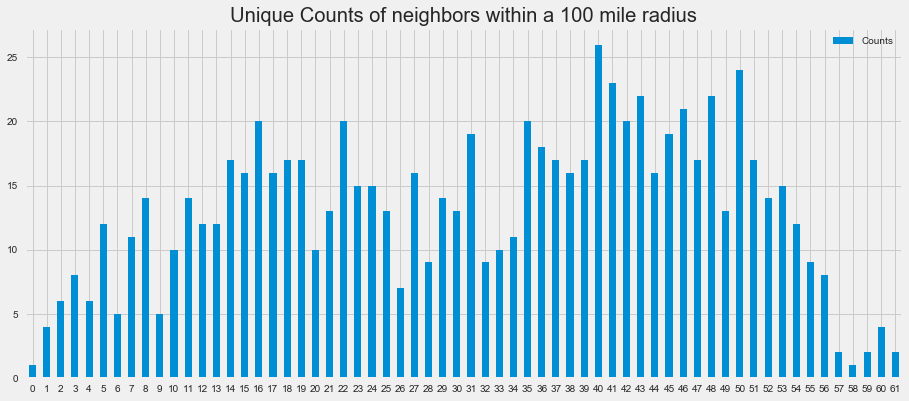

In [105]:
pd.DataFrame({"Counts":cnts}, index=uniq).plot.bar(rot=False, figsize=(14,6),
                                                   title="Unique Counts of neighbors within a 100 mile radius");

In [106]:
kN5_preds = []
for i in range(full_data.shape[0]):
    neighbors = []
    for j in neigh_table[i]:
        n = full_data.iloc[j][pop_list[i]]
        neighbors.append(n)
    kN5_preds.append(np.mean(neighbors))

kN5_preds[:5]

[55.200000000000003, 45.0, 54.0, 67.200000000000003, 93.599999999999994]

In [107]:
kN1_preds = []
for i in range(full_data.shape[0]):
    n = full_data.iloc[neigh_table[i][0]][pop_list[i]]
    kN1_preds.append(n)
    
kN1_preds[:5]

[51.0, 52.0, 44.0, 79.0, 94.0]

In [108]:
cheating = kN1_preds[r_neighbors.index(0)]
cheating

89.5

In [109]:
kRad_preds = []
for i in range(full_data.shape[0]):
    neighbors = []
    for j in radius_table[i]:
        n = full_data.iloc[j][pop_list[i]]
        neighbors.append(n)
    if neighbors:
        kRad_preds.append(np.mean(neighbors))
    else:
        kRad_preds.append(cheating)

kRad_preds[:5]

[51.375,
 52.299999999999997,
 54.620000000000005,
 74.727272727272734,
 97.909090909090907]

In [110]:
radius_table2 = k_n.build_radius_table(radius=330)
r_neighbors2 = [len(i) for i in radius_table2]
uniq, cnts = np.unique(r_neighbors2, return_counts=True)
uniq, cnts

(array([  1,   6,   8,   9,  11,  15,  16,  17,  18,  19,  21,  22,  23,
         25,  26,  28,  31,  32,  33,  35,  36,  37,  38,  41,  47,  48,
         54,  58,  60,  61,  63,  64,  65,  67,  68,  70,  71,  72,  73,
         75,  77,  78,  80,  81,  82,  83,  84,  86,  87,  88,  89,  91,
         92,  94,  95,  96,  97,  98,  99, 100, 102, 103, 104, 106, 108,
        109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 121, 122, 123,
        124, 125, 127, 128, 129, 130, 131, 132, 133, 136, 137, 138, 139,
        140, 141, 142, 143, 144, 146, 147, 148, 149, 151, 152, 154, 157,
        158, 159, 160, 161, 162, 163, 165, 167, 169, 170, 171, 172, 173,
        174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 186, 188,
        190, 191, 192, 194, 195, 197, 199, 200, 201, 202, 203, 205, 207,
        208, 209, 211, 212, 213, 214, 215, 217, 218, 219, 220, 221, 222,
        223, 224, 225, 226, 227, 228, 229, 230, 233, 234, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247

# Predictions

In [111]:
# save the years (and indices) of the randomly chosen year for duplication
predictions = pd.DataFrame({"years":pop_list}, index=full_data.index)
predictions["y_true"] = true
predictions["lr_preds"] = y_pred
predictions["ffill_preds"] = ffill_preds
predictions["yr_mean_preds"] = yr_mean_preds
predictions["county_mean_preds"] = county_mean_preds
predictions["euc_preds"] = euc_preds
predictions["hav_preds"] = hav_preds
predictions["euc_exp_smooth_preds"] = euc_exp_smooth_preds
predictions["hav_exp_smooth_preds"] = hav_exp_smooth_preds
predictions["k_Nearest_One_pred"] = kN1_preds
predictions["k5_Nearest_Mean_pred"] = kN5_preds
predictions["kRad_Mean_pred"] = kRad_preds
predictions.head()

,years,y_true,lr_preds,ffill_preds,yr_mean_preds,county_mean_preds,euc_preds,hav_preds,euc_exp_smooth_preds,hav_exp_smooth_preds,k_Nearest_One_pred,k5_Nearest_Mean_pred,kRad_Mean_pred
fips_code,,,,,,,,,,,,,
01049,1971,56.0,44.291554,35.0,82.610870,80.874125,81.053838,81.439879,69.226215,67.947712,51.0,55.2,51.375000
01077,1974,40.0,42.451339,55.5,84.854348,69.302494,68.879597,68.735357,59.466057,58.641146,52.0,45.0,52.300000
01079,1975,42.0,40.999238,34.0,86.739130,79.548808,78.455999,78.689687,64.901696,64.365634,44.0,54.0,54.620000
01083,1976,68.0,48.356844,44.0,90.093478,81.640075,78.212395,78.290360,79.389315,78.286418,79.0,67.2,74.727273
01089,1995,104.0,96.569409,116.7,91.810870,108.335094,108.202032,108.422687,103.296553,102.437904,94.0,93.6,97.909091


In [73]:
predictions.to_csv("corn_predicitions.csv")

# Prediction Accuracy Metrics

### Mean Absolute Percentage Error (MAPE)
- Metric commonly used in time series forecasting
- Average percentage of errors in the predictions
    - Disregards the direction (above or below the true value).
    
### Median Absolute Error (MAE)
- Median of the absolute values of the errors. (Robust to outliers)
- Quantifies the deviation from the real values in the original unit (bu/acre in this case).

### Root Mean Squared Error (RMSE)
- Commonly used metric to compare regression models  
    - Only applies to models fit on the same data
    
### R Squared (R2)
- The R-Squared statistic gives an indication of the portion of the model that is effective at explaining the dependent variable.
    - Perfect score of 1.0 
    - Low R-Squared --> independent variables do NOT do a good job at explaining the dependent (target) variable.  
    - High R-Squared --> independent variables do a good job at explaining the dependent (target) variable. 
    - Ex: R-Squared --> 0.65 --> 65% of the variations in yield returns are “explained” by the model, whereas the remaining 35% is “unexplained”).

In [112]:
def mape(y_pred,y_true):
    y_pred = np.asarray(y_pred)
    y_true = np.asarray(y_true)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [113]:
pred_cols = [col for col in predictions.columns if "pred" in col]
MAPE, MAE, R2, RMSE = [], [], [], []

for col in pred_cols:
    MAPE.append(mape(predictions["y_true"], predictions[col]))
    MAE.append(median_absolute_error(predictions["y_true"], predictions[col]))
    R2.append(r2_score(predictions["y_true"], predictions[col]))
    RMSE.append(np.sqrt(mean_squared_error(predictions["y_true"], predictions[col])))
    
metric_df = pd.DataFrame({"MAPE": MAPE, "MAE":MAE, "RMSE":RMSE, "RSQUARED":R2}, 
                         index=[col.upper() for col in pred_cols])
metric_df

,MAE,MAPE,RMSE,RSQUARED
LR_PREDS,16.259128,15.391319,20.974519,0.695878
FFILL_PREDS,21.895946,25.181512,29.205991,0.410333
YR_MEAN_PREDS,26.445981,23.840479,33.094485,0.242863
COUNTY_MEAN_PREDS,21.031395,19.000324,26.373089,0.519177
EUC_PREDS,22.971038,21.131063,28.679192,0.431413
HAV_PREDS,23.159054,21.388718,28.846009,0.424779
EUC_EXP_SMOOTH_PREDS,11.584504,10.768712,15.334416,0.837446
HAV_EXP_SMOOTH_PREDS,11.496846,10.698189,15.290510,0.838376
K_NEAREST_ONE_PRED,10.817568,10.506008,14.915070,0.846215
K5_NEAREST_MEAN_PRED,8.834767,8.674622,12.996088,0.883242


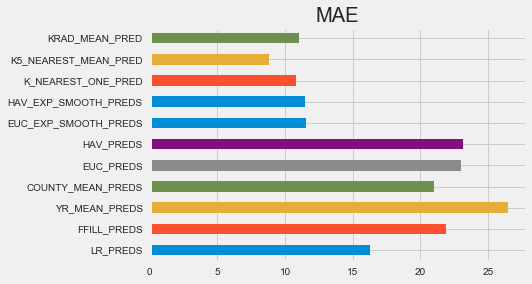

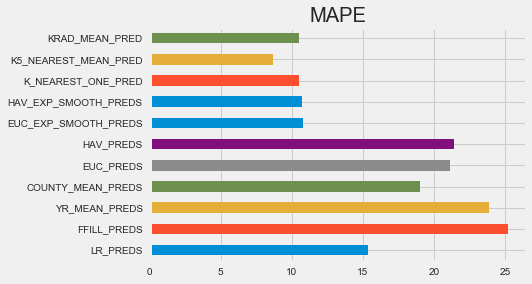

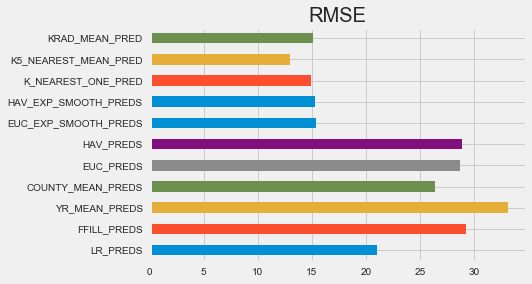

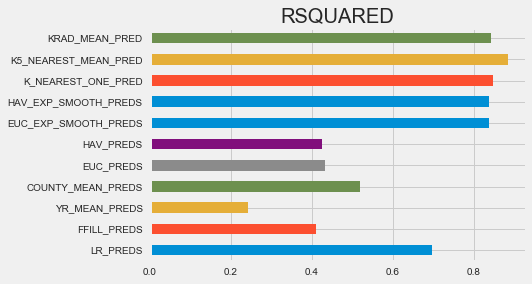

In [114]:
for col in metric_df.columns:
    metric_df[col].plot(kind="barh", title=col)
    plt.show();

# Save dataframe of results

In [77]:
metric_df.to_csv("corn_metrics.csv")

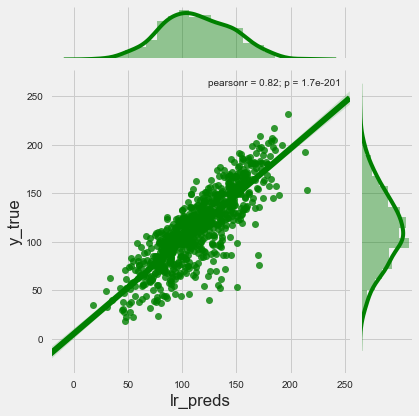

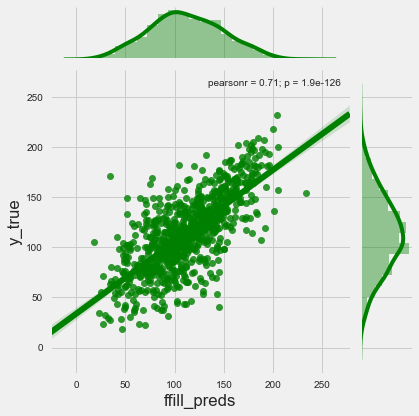

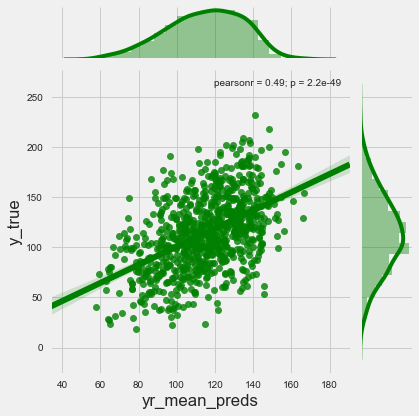

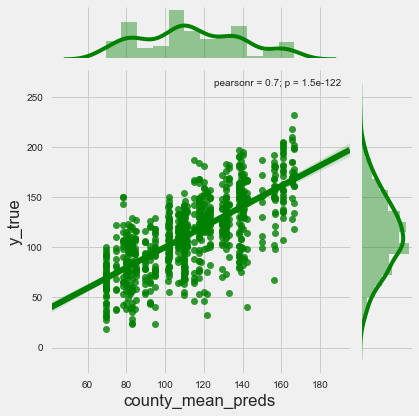

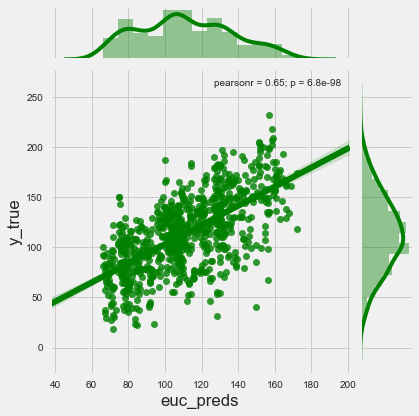

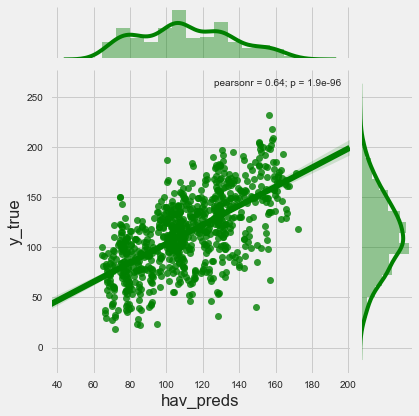

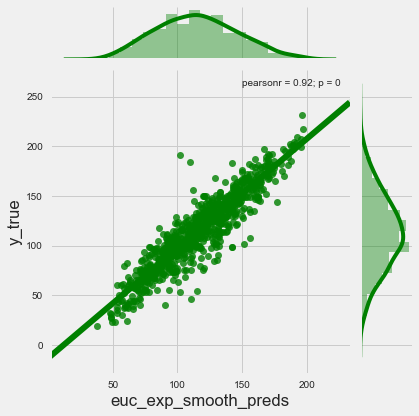

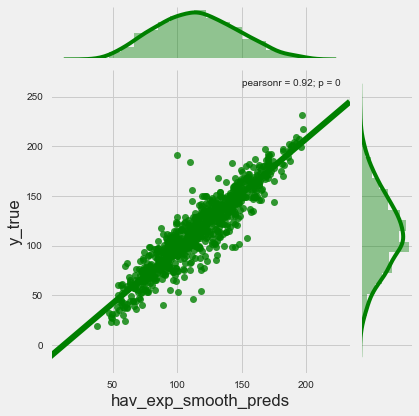

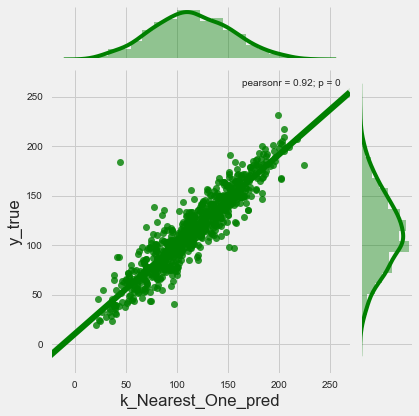

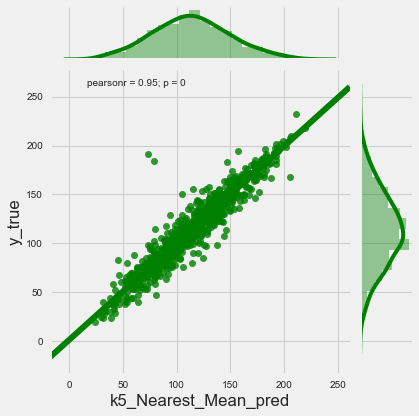

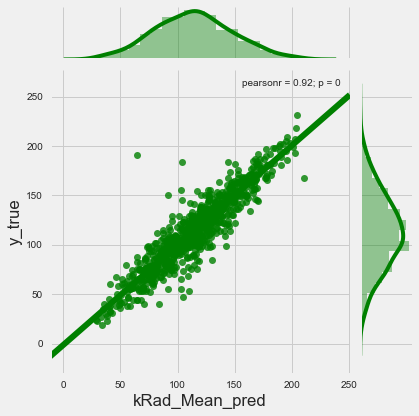

In [78]:
for col in pred_cols: 
    sns.jointplot(data=predictions, x=col, y='y_true', kind='reg', color='g')
    plt.show();
    print()

___